In [1]:
# feed forward neural network implement karaich a 

import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


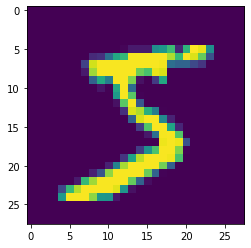

In [7]:
plt.imshow(X_train[0])
print(y_train[0])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
print(X_test[9999])
print(X_train[23])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.03137255
  0.45882353 0.99607843 0.8627451  0.34901961 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [14]:
history = model.fit(X_train,y_train, epochs=25, verbose = True, validation_split = 0.2, batch_size=32)

Epoch 1/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7080 - accuracy: 0.8265 - val_loss: 0.3769 - val_accuracy: 0.9003
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3595 - accuracy: 0.8999 - val_loss: 0.3061 - val_accuracy: 0.9151
Epoch 3/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3071 - accuracy: 0.9130 - val_loss: 0.2728 - val_accuracy: 0.9249
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2752 - accuracy: 0.9223 - val_loss: 0.2512 - val_accuracy: 0.9295
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2515 - accuracy: 0.9294 - val_loss: 0.2314 - val_accuracy: 0.9357
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2323 - accuracy: 0.9345 - val_loss: 0.2160 - val_accuracy: 0.9407
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2160 - accuracy: 0.9392 - val_loss: 0.2053 - val_accuracy:

In [15]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [16]:
predictions[5]

array([1.3166785e-05, 9.9088532e-01, 2.5636784e-04, 1.9486035e-04,
       4.9867620e-05, 5.1026735e-05, 1.2831527e-05, 7.1955393e-03,
       1.1605744e-03, 1.8043304e-04], dtype=float32)

the highest number is 1


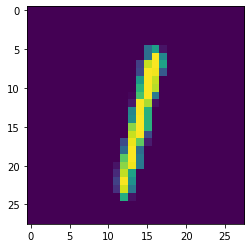

In [17]:
import random
n=random.randint(0,9999)
max_value = np.argmax(predictions[n])
print(f'the highest number is {max_value}')
plt.imshow(X_test[n])

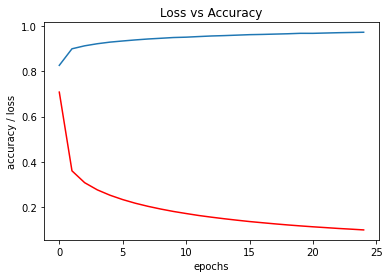

In [18]:
plt.title("Loss vs Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy / loss')
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['accuracy'])

In [19]:
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'])

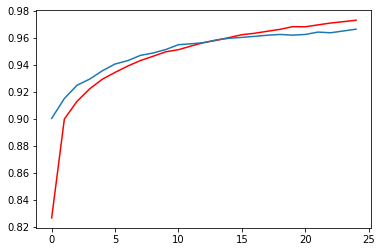

In [20]:
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'])